Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

Anne Lohmeijer 10447555

Lukas Kiss 12457299

Steven Raaijmakers

----
# Project keywords
ODEs, time integration

----
# Project description
There is a wide variety of mathematical models for time-evolving systems formulated as sets of coupled ordinary differential equations (ODEs). Examples range from meteorology and population dynamics to celestial mechanics and chemical reactions. In many cases, these ODEs cannot be solved analytically, and instead they are simulated by means of numerical time integration. In this assignment we will explore various various time integration methods.



We consider a very simple system, one where we know the exact (analytical) solution so that we can easily compare results from numerical integration with the exact solution. The set of ODEs
$$\begin{array}{rcl}
\frac{dx}{dt} & = & y, \\
\frac{dy}{dt} & = & -\omega^2 \, x
\end{array}$$
are the equations for the $\textit{harmonic oscillator}$. This is a Hamiltonian system for which the Hamiltonian (or total energy) is given by $H=\tfrac12 (y^2 + \omega^2 \, x^2)$. 

In [2]:
# Imports

import numpy as np

import matplotlib.pyplot as plt

----
# Project exercises
## Exercise 1
Read sections 9.1-9.3 from the book by Heath.



## Exercise 2
Solve the ODEs for the harmonic oscillator. Write down exact expressions for $x(t)$ and $y(t)$ given an arbitrary initial condition $x(t=0)=x_0, \, y(t=0)=y_0$. Make sure you solution is correct, as this will be your benchmark to compare numerical solutions against.



## Exercise 3
Prove that the Hamiltonian is a conserved quantity, i.e. $H$ remains constant in time.



## Exercise 4
Set $\omega=1$. Use the forward Euler scheme to integrate the ODEs in time, from $t=0$ to $t=50$, with initial condition e.g. $(x_0,y_0)=(1,0)$. What is you time step $\Delta t$? Compare your numerical solution with the exact solution: make a plot of $x(t)$ versus $t$ for both solutions, and plot $H$ versus $t$. Pick a set of initial conditions (e.g. the corners of a square, $(x_0, y_0) = (1\pm 0.5, \pm 0.5)$), integrate these forward up to $t=10$, and plot the paths $(x(t),y(t))$. Compare with the exact solution.



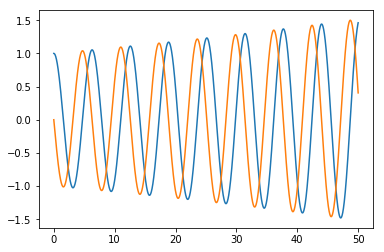

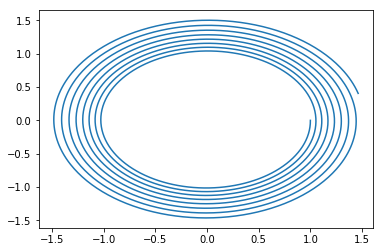

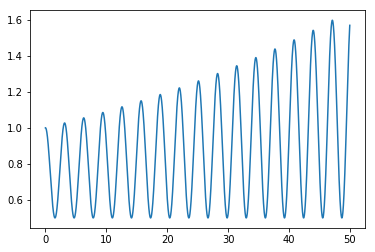

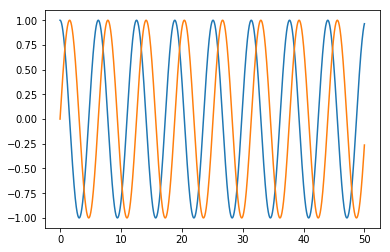

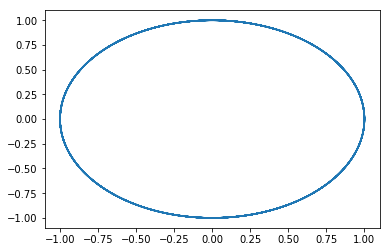

In [3]:
def dxdt(pos):
    return pos[1]

def dydt(pos, u):
    return -np.power(u,2)*pos[0]

def hamilton(x, y, u):
    return 1/2*(np.power(u,2) + np.power(u,2)*np.power(x,2))



def X(init, t, u):
    return init[0]*np.cos(u*t) + (init[1]*np.sin(u*t))/u

def Y(init, t, u):
    return init[1]*np.cos(u*t) + init[0]*u*np.sin(u*t)


def sim(init, u, time):
    ret = [init]
    
    Ts, h = np.linspace(0,time, 3000, retstep = True)
    
    for _ in Ts[1:]:
        init = init + h*np.array([dxdt(init), dydt(init,u)])
        ret.append(init)
    
    return Ts, np.array(ret)

init = np.array([1.0,0.0])

Ts, r = sim(init, 1, time = 50)

plt.plot(Ts, r)
plt.show()
x = r.T[0]
y = r.T[1]
plt.plot(x,y)
plt.show()

#Calculating Hamiltonian 


ham = np.apply_along_axis(lambda ar : hamilton(ar[0],ar[1], u = 1), 1, r)
plt.plot(Ts, ham)
plt.show()


#exact plot

Ts = np.linspace(0,50, 3000)

v_X = np.vectorize(lambda t: X([1,0], t, 1))
v_Y = np.vectorize(lambda t: Y([1,0], t, 1))

x = v_X(Ts)
y = v_Y(Ts)
plt.plot(Ts, list(zip(x,y)))
plt.show()
plt.plot(x,y)
plt.show()



## Exercise 5
Experiment with changing the integration time step $\Delta t$. Assess the convergence by plotting the norm of the error (at some fixed time, e.g. $t=1$) versus $\Delta t$, over several orders of magnitude of $\Delta t$. Can you see that Euler's method is 1st order accurate?



## Exercise 6
Repeat the experiments above, but now with the backward Euler scheme.



## Exercise 7
Experiment with an integration schemes that gives higher order accuracy. Can you verify the order of accuracy with your numerical experiments? Does it conserve the Hamiltonian?



## Exercise 8
It is far from trivial that a time integration method respects conservation properties of the systems of ODEs, such as energy conservation. The topic of \textit{geometric numerical integration} deals with integration methods that are structure-preserving; preserving the Hamiltonian structure (and thereby the Hamiltonian itself) is one example.



The St\"{o}rmer -Verlet (SV) scheme preserves the symplectic structure of Hamiltonian systems. For a general set of ODEs given by $dx/dt = f(y), \,\, dy/dt = g(x)$, the SV scheme with time step $\Delta t$ reads
$$\begin{array}{rcl}
    y^* & = & y_k + \frac{1}{2} \Delta t \cdot g(x_k) \\
    x_{k+1} & = & x_k + \Delta t \cdot f(y^*) \\
    y_{k+1} & = & y^* + \frac{1}{2} \Delta t \cdot g(x_{k+1}).
\end{array}$$

Use this scheme to integrate the ODEs of the harmonic oscillator. Compare with the results from other integration schemes.

What happens with the Hamiltonian when using the SV scheme? What is the order of accuracy of the SV scheme?